# load the data

In [122]:
# Load data from the CSV file
data <- read.csv("data/timeseries.csv")

# Remove useless data
# data <- data[, -1]

# View the first few rows of the data
head(data)

,sim_number,time,chemostat_id,integer,frequency
,<int>,<dbl>,<int>,<int>,<int>
1,1,0,1,1,1000
2,1,0,1,2,1
3,1,1,1,1,1000
4,1,1,1,7,20
5,1,1,1,2,264
6,1,1,1,18,1


# print the bar plot for integers

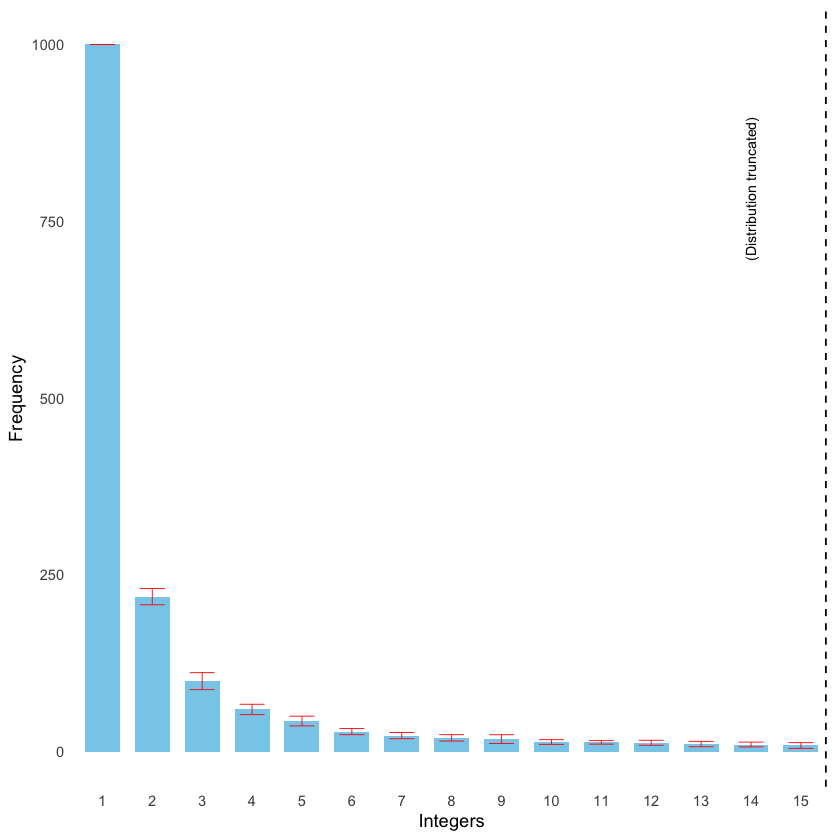

In [171]:
# Ensure required libraries are installed
if (!require(ggplot2)) install.packages("ggplot2")
if (!require(dplyr)) install.packages("dplyr")

# Load libraries
library(ggplot2)
library(dplyr)

# Keep only entries with the highest value for "time"
highest_time <- max(data$time, na.rm = TRUE)
filtered_data <- data[data$time == highest_time, ]

# Calculate mean and standard deviation over "sim_number"
summary_data <- filtered_data %>%
  group_by(integer) %>%
  summarize(
    mean_frequency = mean(frequency),
    sd_frequency = sd(frequency),
    .groups = "drop"
  )

# Ensure only the first 25 integers are displayed on the x-axis
summary_data <- summary_data %>%
  filter(integer <= 15)

# Create a bar plot with reversed axes
p = ggplot(summary_data, aes(x = factor(integer), y = mean_frequency)) +
  geom_bar(stat = "identity", fill = "skyblue", width = 0.7) +
  geom_errorbar(aes(ymin = mean_frequency - sd_frequency, ymax = mean_frequency + sd_frequency),
                linewidth = 0.25, width = 0.5, color = "red") +
  # Add a dashed line to indicate truncation
  geom_vline(xintercept = 15.5, linetype = "dashed", color = "black") +
  # Add a text label for truncation
  annotate("text", x = 14, y = max(summary_data$mean_frequency), 
           label = "(Distribution truncated)", size = 3, color = "black", angle = 90, hjust = 1.5) +
  labs(
    x = "Integers",
    y = "Frequency"
  ) +
  theme_minimal() +
  theme(
    panel.grid = element_blank()
  )
#   theme(axis.text.x = element_text(size = 8))

print(p)

# calculate the assembly index for the integers in our time series

In [124]:
data <- read.csv("data/timeseries.csv")

# Load the CSV file
ai <- read.csv("Assembly-10000.csv")

# Map assemblyindex values based on integer values
data <- data %>%
  left_join(ai, by = c("integer" = "integer")) %>%  # Join on the "integer" column
  mutate(assemblyindex = assemblyindex) # %>%              # Replace original integer values with assemblyindex
  # select(-assemblyindex)                           # Remove the duplicate column

# print(data)

# plot another bar plot with the assembly index instead of integers

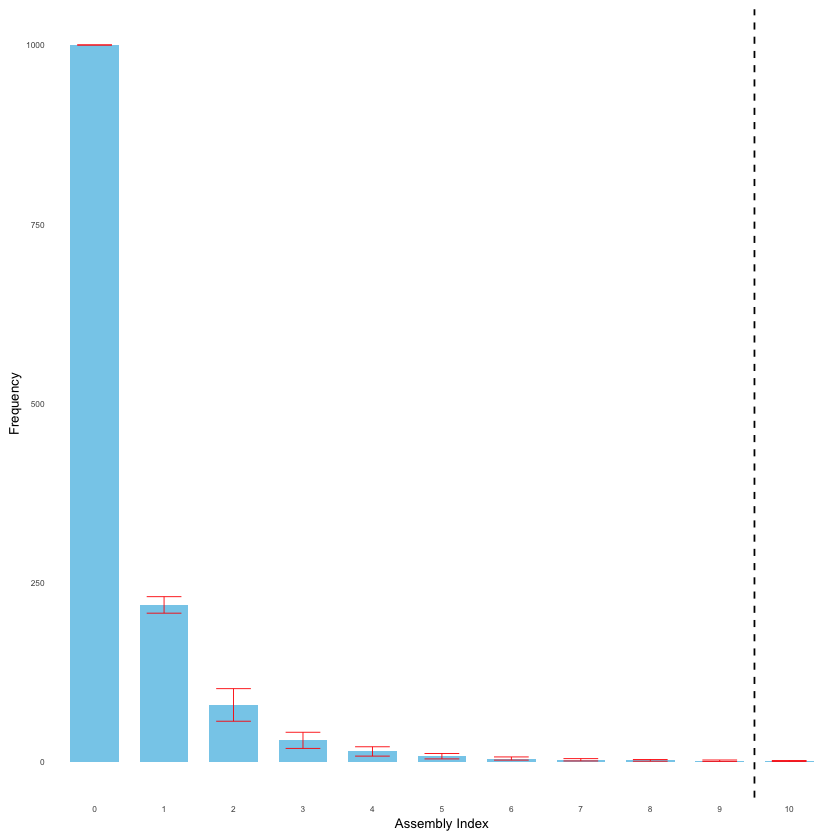

In [169]:
# Keep only entries with the highest value for "time"
highest_time <- max(data$time, na.rm = TRUE)
filtered_data <- data[data$time == highest_time, ]

# Calculate mean and standard deviation over "sim_number"
summary_data <- filtered_data %>%
  group_by(assemblyindex) %>%
  summarize(
    mean_frequency = mean(frequency),
    sd_frequency = sd(frequency),
    .groups = "drop"
  )

# Ensure only the first 25 assemblyindex are displayed on the x-axis
summary_data <- summary_data %>%
  filter(assemblyindex <= 10)

# # Handle multiple values by grouping and averaging
# data <- data %>%
#   group_by(assemblyindex) %>%
#   summarise(across(everything(), mean, na.rm = TRUE))

# Create a bar plot with reversed axes
p2 = ggplot(summary_data, aes(x = factor(assemblyindex), y = mean_frequency)) +
  geom_bar(stat = "identity", fill = "skyblue", width = 0.7) +
  geom_errorbar(aes(ymin = mean_frequency - sd_frequency, ymax = mean_frequency + sd_frequency),
                linewidth = 0.25, width = 0.5, color = "red") +
  # Add a dashed line to indicate truncation
  geom_vline(xintercept = 10.5, linetype = "dashed", color = "black") +
  labs(
    x = "Assembly Index",
    y = "Frequency"
  ) +
  theme_minimal() + 
  theme(
    panel.grid = element_blank(),
    plot.background = element_rect(fill = "white", color = NA), # White background
    panel.background = element_rect(fill = "white", color = NA),
    axis.text = element_text(size = 5),   # Smaller axis text
    axis.title = element_text(size = 8)   # Smaller axis titles
  )

  print(p2)

# now insert the second plot into the first one as inset

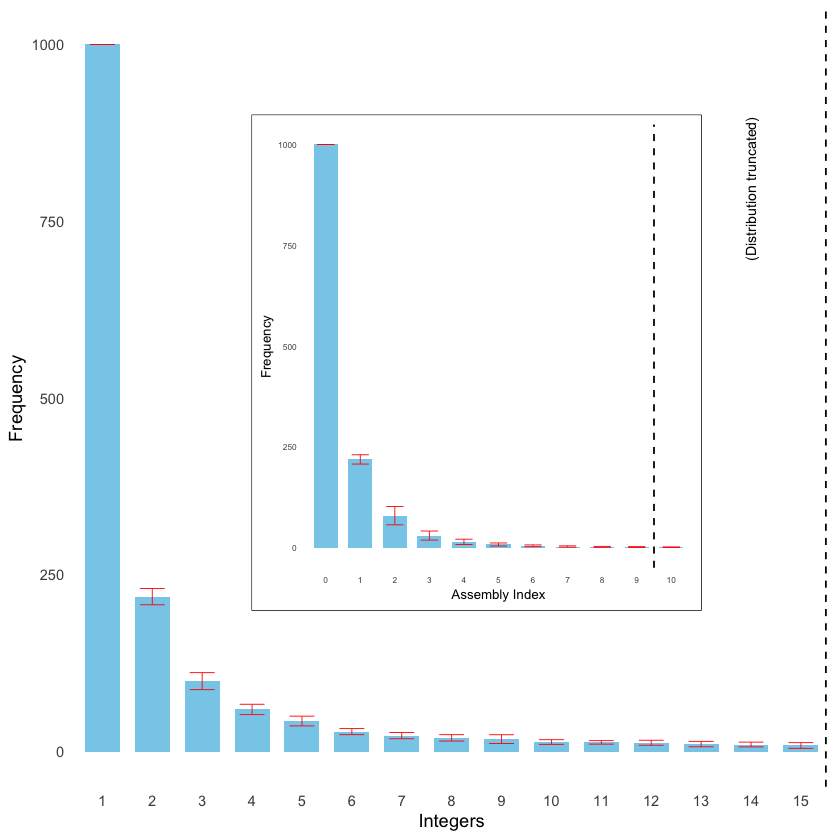

In [172]:
library(grid)

# Convert the inset plot to a grob
inset_grob <- ggplotGrob(p2)

xmin = 4
xmax = 13
ymin = 200
ymax = 900

# Add the inset plot to the main plot using annotation_custom()
combined_plot <- p +
  annotation_custom(
    grob = rectGrob(
      gp = gpar(fill = "white", col = "black", lwd = 1) # Rectangle with white fill and black border
    ),
    xmin = xmin, xmax = xmax,
    ymin = ymin, ymax = ymax
  ) +
  annotation_custom(
    grob = inset_grob,
    xmin = xmin, xmax = xmax,
    ymin = ymin, ymax = ymax
  )

# Display the combined plot
print(combined_plot)

ggsave(filename = "figs/13_integers-histogram.pdf", plot = combined_plot, width = 80, height = 70, units = "mm")